## Text analysis with Python


Copyright 2019 Allen Downey

[MIT License](https://opensource.org/licenses/MIT)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

Word Frequencies
----------------

Let's look at frequencies of words, bigrams and trigrams in a text.

The following function reads lines from a file or URL and splits them into words:

In [2]:
def iterate_words(filename):
    """Read lines from a file and split them into words."""
    for line in open(filename):
        for word in line.split():
            yield word.strip()

Here's an example using a book from Project Gutenberg.  `wc` is a Counter of words, that is, a dictionary that maps from each word to the number of times it appears:

In [3]:
from collections import Counter

In [4]:
# FAIRY TALES
# By The Brothers Grimm
# http://www.gutenberg.org/cache/epub/2591/pg2591.txt'
wc = Counter(iterate_words('pg2591.txt'))

Here are the 20 most common words:

In [5]:
wc.most_common(20)

[('the', 6507),
 ('and', 5250),
 ('to', 2707),
 ('a', 1932),
 ('he', 1817),
 ('of', 1450),
 ('was', 1337),
 ('in', 1080),
 ('she', 1049),
 ('that', 1021),
 ('his', 1014),
 ('you', 941),
 ('it', 881),
 ('her', 880),
 ('had', 827),
 ('I', 755),
 ('they', 751),
 ('for', 721),
 ('with', 720),
 ('as', 718)]

Word frequencies in natural languages follow a predictable pattern called Zipf's law (which is an instance of Stigler's law, which is also an instance of Stigler's law).

We can see the pattern by lining up the words in descending order of frequency and plotting their counts (6507, 5250, 2707) versus ranks (1st, 2nd, 3rd, ...):

In [6]:
def counter_ranks(wc):
    """Returns ranks and counts as lists."""
    return zip(*enumerate(sorted(wc.values(), reverse=True)))

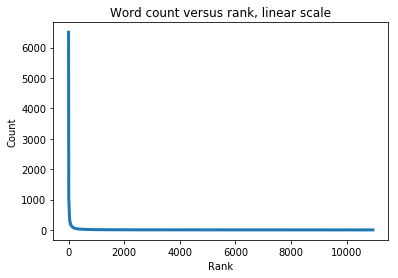

In [7]:
ranks, counts = counter_ranks(wc)
plt.plot(ranks, counts, linewidth=3)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Word count versus rank, linear scale');

Huh.  Maybe that's not so clear after all.  The problem is that the counts drop off very quickly.  If we use the highest count to scale the figure, most of the other counts are indistinguishable from zero.

Also, there are more than 10,000 words, but most of them appear only a few times, so we are wasting most of the space in the figure in a regime where nothing is happening.

This kind of thing happens a lot.  A common way to deal with it is to compute the log of the quantities or to plot them on a log scale:

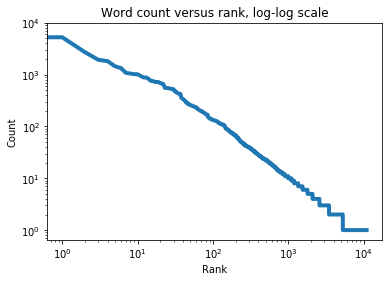

In [8]:
ranks, counts = counter_ranks(wc)
plt.plot(ranks, counts, linewidth=4)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.title('Word count versus rank, log-log scale');

This (approximately) straight line is characteristic of Zipf's law.

n-grams
-------

On to the next topic: bigrams and trigrams.

In [9]:
from itertools import tee

def pairwise(iterator):
    """Iterates through a sequence in overlapping pairs.
    
    If the sequence is 1, 2, 3, the result is (1, 2), (2, 3), (3, 4), etc.
    """
    a, b = tee(iterator)
    next(b, None)
    return zip(a, b)

`bigrams` is the histogram of word pairs:

In [10]:
bigrams = Counter(pairwise(iterate_words('pg2591.txt')))

And here are the 20 most common:

In [11]:
bigrams.most_common(20)

[(('to', 'the'), 444),
 (('in', 'the'), 399),
 (('of', 'the'), 369),
 (('and', 'the'), 349),
 (('into', 'the'), 294),
 (('said', 'the'), 251),
 (('on', 'the'), 199),
 (('and', 'when'), 168),
 (('he', 'had'), 164),
 (('he', 'was'), 164),
 (('to', 'be'), 163),
 (('it', 'was'), 152),
 (('Then', 'the'), 151),
 (('I', 'will'), 149),
 (('that', 'he'), 143),
 (('at', 'the'), 142),
 (('came', 'to'), 138),
 (('and', 'he'), 135),
 (('she', 'was'), 129),
 (('all', 'the'), 125)]

Similarly, we can iterate the trigrams:

In [12]:
def triplewise(iterator):
    a, b, c = tee(iterator, 3)
    next(b)
    next(c)
    next(c)
    return zip(a, b, c)

And make a Counter:

In [13]:
trigrams = Counter(triplewise(iterate_words('pg2591.txt')))

# Uncomment this line to run the analysis with Elvis Presley lyrics
#trigrams = Hist(triplewise(iterate_words('lyrics-elvis-presley.txt')))

Here are the 20 most common:

In [14]:
trigrams.most_common(20)

[(('came', 'to', 'the'), 65),
 (('and', 'when', 'he'), 50),
 (('out', 'of', 'the'), 50),
 (('said', 'to', 'the'), 34),
 (('he', 'came', 'to'), 33),
 (('and', 'when', 'she'), 33),
 (('went', 'into', 'the'), 32),
 (('went', 'to', 'the'), 31),
 (('and', 'said', 'to'), 31),
 (('one', 'of', 'the'), 30),
 (('came', 'to', 'a'), 30),
 (('and', 'as', 'he'), 29),
 (('they', 'came', 'to'), 29),
 (('he', 'did', 'not'), 28),
 (('there', 'was', 'a'), 28),
 (('that', 'he', 'had'), 28),
 (('and', 'I', 'will'), 27),
 (('that', 'it', 'was'), 25),
 (('and', 'at', 'last'), 24),
 (('and', 'when', 'the'), 24)]

### Markov analysis

And now for a little fun.  I'll make a dictionary that maps from each word pair to a Counter of the words that can follow.

In [15]:
from collections import defaultdict

d = defaultdict(Counter)
for a, b, c in trigrams:
    d[a, b][c] += trigrams[a, b, c]

Now we can look up a pair and see what might come next:

In [16]:
d['the', 'blood']

Counter({'ran': 2,
         'on': 1,
         'of': 2,
         'that': 1,
         'came,': 1,
         'streamed': 1,
         'fell': 1,
         'might': 1,
         'ran.': 1})

Here are the most common words that follow "into the":

In [17]:
d['into', 'the'].most_common(10)

[('forest', 15),
 ('forest,', 13),
 ('garden', 9),
 ('kitchen,', 8),
 ('cellar', 8),
 ('wide', 7),
 ('room,', 7),
 ('water,', 7),
 ('wood', 6),
 ('kitchen', 6)]

Here are the words that follow "said the":

In [18]:
d['said', 'the'].most_common(10)

[('old', 13),
 ('man,', 12),
 ('little', 10),
 ('fisherman,', 8),
 ('father,', 7),
 ('ass,', 6),
 ('other;', 5),
 ('wife,', 5),
 ('fish;', 5),
 ('fish.', 5)]

The following function chooses a random word from the suffixes in a Counter:

In [19]:
import random

def choice(counter):
    """Chooses a random element."""
    return random.choice(list(counter.elements()))

In [20]:
choice(d['said', 'the'])

'fox,'

Given a prefix, we can choose a random suffix:

In [21]:
prefix = 'said', 'the'
suffix = choice(d[prefix])
suffix

'fisherman,'

Then we can shift the words and compute the next prefix:

In [22]:
prefix = prefix[1], suffix
prefix

('the', 'fisherman,')

Repeating this process, we can generate random new text that has the same correlation structure between words as the original:

In [23]:
for i in range(100):
    suffix = choice(d[prefix])
    print(suffix, end=' ')
    prefix = prefix[1], suffix

'how happily we shall be your waiting-maid any longer.' So they went up to the forest. Ah! what a blockhead that brother of the sick; the virtues of all one daughter. Although the little birds are singing; you walk gravely along as if they have a lad who takes care of this agreement violates the law of the mill went 'Click clack, click clack, click clack, click clack.' The bird settled on the ground, he thought to find the way homewards free from the roof with his hand into his ear and tell all she had scarcely touched her sister, 

With a prefix of two words, we typically get text that flirts with sensibility.